<a href="https://colab.research.google.com/github/jcs-lambda/DS-Unit-2-Applied-Modeling/blob/master/module1/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

## setup / imports

In [0]:
import sys

if 'google.colab' in sys.modules:
  dhs_foia_fy2018_data = 'https://github.com/jcs-lambda/DS-Unit-2-Applied-Modeling/blob/master/data/dhs_foia_fy2018.csv?raw=true'
  !pip install -U --quiet pandas-profiling category_encoders
else:
  dhs_foia_fy2018_data = '../data/dhs_foia_fy2018.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(dhs_foia_fy2018_data)
print('Shape:', df.shape)

Shape: (125143, 13)


In [0]:
random_state = 13

In [0]:
agencies = {
    'CISA':'Cybersecurity and Infrastructure Security Agency',
    'FEMA':'Federal Emergency Management Agency',
    'FLETC':'Federal Law Enforcement Training Centers',
    'I&A':'Office of Intelligence and Analysis',
    'ICE':'U.S. Immigration and Customs Enforcement',
    'OIG':'Office of Inspector General',
    'PRIV':'Privacy Office',
    'S&T':'Science and Technology Directorate',
    'TSA':'Transportation Security Administration',
    'USCG':'United States Coast Guard',
    'USSS':'United States Secret Service'
}

# Choose your target

In [5]:
df

,Request #,Agency,Initial Request Type,Track Type,Initial Received Date,Perfected,Case Status,Days Opened,Closed Date,Days to Process,Disposition,"Disposition ""Other"" Reason",Exemptions Used
0,2017-OBFO-02364,CISA,OBIM FOIA,Complex,2016-11-04,NaN,Open,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-OBFO-03060,CISA,OBIM FOIA,Complex,2016-10-21,NaN,Open,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-OBFO-03260,CISA,OBIM FOIA,Simple,2016-11-28,NaN,Closed,NaN,2018-01-29,NaN,Other Reasons,NaN,NaN
3,2017-OBFO-03857,CISA,OBIM FOIA,Complex,2016-12-07,NaN,Closed,NaN,2017-10-23,NaN,Granted/Denied in Part,"(b)(6),(b)(7)(C),(b)(7)(E),(k)(2)",NaN
4,2017-OBFO-02413,CISA,OBIM FOIA,Complex,2016-11-03,NaN,Open,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125138,20181461,USSS,FOIA,Simple,2018-09-24,2018-09-24,Open,4.0,NaN,NaN,NaN,NaN,NaN
125139,20181462,USSS,FOIA/PA,Simple,2018-09-24,2018-09-24,Open,4.0,NaN,NaN,NaN,NaN,NaN
125140,20181463,USSS,FOIA/PA,Simple,2018-09-27,2018-09-27,Open,1.0,NaN,NaN,NaN,NaN,NaN
125141,20181464,USSS,FOIA/PA,Simple,2018-09-27,2018-09-27,Open,1.0,NaN,NaN,NaN,NaN,NaN


**'Case Status'** will be my target

In [0]:
target = 'Case Status'

In [7]:
df[target].describe()

count     125143
unique         7
top       Closed
freq      113617
Name: Case Status, dtype: object

In [8]:
df[target].unique()

array(['Open', 'Closed', 'On Hold-Need Info/Clarification',
       'On Hold-Other', 'On Hold-Fee Related', 'open ', 'closed'],
      dtype=object)

In [9]:
# Correct for capitalization / extra spaces
# Combine all 'On Hold'+ categories into one 'On Hold' category

df[target] = df[target].str.replace('closed', 'Closed')
df[target] = df[target].str.replace('open ', 'Open')
df[target] = df[target].str.replace('On Hold.*', 'On Hold')
df[target].unique()

array(['Open', 'Closed', 'On Hold'], dtype=object)

# Is your problem regression or classification

this is a classification problem

# How is your target distributed

In [10]:
df[target].value_counts(normalize=True)

Closed     0.907985
Open       0.087340
On Hold    0.004675
Name: Case Status, dtype: float64

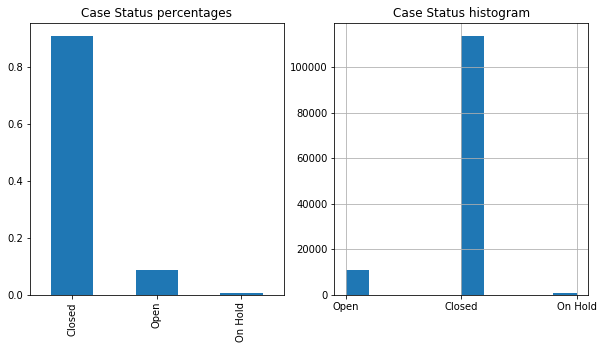

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(w=10, h=5)
df[target].value_counts(normalize=True).plot.bar(ax=ax1)
df[target].hist(ax=ax2)
ax1.set_title('Case Status percentages')
ax2.set_title('Case Status histogram')
plt.show()

# Choose your evaluation metrics

Combine 'On hold' with 'Open', because both categories are NOT 'Closed'

Open / Closed is pretty self explanatory.

In [12]:
df[target] = df[target].str.replace('On Hold', 'Open')
df[target].value_counts(normalize=True)

Closed    0.907985
Open      0.092015
Name: Case Status, dtype: float64

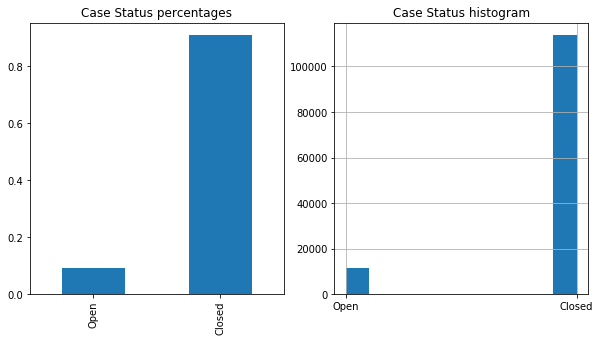

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(w=10, h=5)
df[target].value_counts(normalize=True).sort_index(ascending=False).plot.bar(ax=ax1)
df[target].hist(ax=ax2)
ax1.set_title('Case Status percentages')
ax2.set_title('Case Status histogram')
plt.show()

Over 90% closed - might have to rethink my approach

# Choose which observations you will use to train, validate, and test your model

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=random_state)
train, val = train_test_split(train, test_size=0.2, random_state=random_state)

train.shape, val.shape, test.shape

((80091, 13), (20023, 13), (25029, 13))

# Begin to clean and explore your data

# Begin to choose which features, if any, to exclude

In [15]:
train.head()

,Request #,Agency,Initial Request Type,Track Type,Initial Received Date,Perfected,Case Status,Days Opened,Closed Date,Days to Process,Disposition,"Disposition ""Other"" Reason",Exemptions Used
73523,2018-ICFO-39132,ICE,ICE FOIA,Simple,2018-05-30,NaN,Closed,2.0,2018-06-01,NaN,Granted/Denied in Part,NaN,"(b)(6),(b)(7)(C),(b)(7)(E)"
3770,2018-OBFO-12588,CISA,OBIM FOIA,Complex,2018-01-13,NaN,Closed,NaN,2018-05-18,NaN,Granted/Denied in Part,"(b)(6),(b)(7)(C),(b)(7)(E),(b)(3):8 U.S.C. 12...",NaN
113675,2018-IGFO-00162,OIG,OIG FOIA,Simple,2018-07-02,NaN,Closed,NaN,2018-08-03,NaN,Denied in Full,(b)(7)(A),NaN
63107,2018-ICFO-49654,ICE,ICE FOIA,Simple,2018-07-16,NaN,Closed,13.0,2018-08-02,NaN,Granted/Denied in Part,NaN,"(b)(6),(b)(7)(C),(b)(7)(E),Duplicate"
68610,2018-ICFO-44699,ICE,ICE FOIA,Simple,2018-06-21,NaN,Closed,22.0,2018-07-24,NaN,Granted/Denied in Part,NaN,"(b)(5),(b)(6),(b)(7)(C),(b)(7)(E),(b)(3):49 U...."


In [16]:
train.describe()

,Days Opened,Days to Process
count,50162.000000,4076.000000
mean,26.671664,97.538027
std,100.513000,181.319829
min,-8.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,26.000000
75%,8.000000,110.000000
max,1631.000000,1581.000000


In [17]:
train.describe(exclude='number')

,Request #,Agency,Initial Request Type,Track Type,Initial Received Date,Perfected,Case Status,Closed Date,Disposition,"Disposition ""Other"" Reason",Exemptions Used
count,80091,80091,80091,80091,80091,4801,80091,74140,74530,23093,40508
unique,80091,10,26,5,1264,868,2,367,6,111,382
top,2018-ICFO-28974,ICE,ICE FOIA,Simple,2018-09-26,2018-05-22,Closed,2018-09-28,Granted/Denied in Part,"(b)(6),(b)(7)(C),(b)(7)(E)","(b)(6),(b)(7)(C),(b)(7)(E)"
freq,1,45734,45593,53501,793,50,72723,964,55824,11726,22511


In [18]:
train.dtypes

Request #                      object
Agency                         object
Initial Request Type           object
Track Type                     object
Initial Received Date          object
Perfected                      object
Case Status                    object
Days Opened                   float64
Closed Date                    object
Days to Process               float64
Disposition                    object
Disposition "Other" Reason     object
Exemptions Used                object
dtype: object

In [19]:
print(train.isnull().sum())
print(len(train))

Request #                         0
Agency                            0
Initial Request Type              0
Track Type                        0
Initial Received Date             0
Perfected                     75290
Case Status                       0
Days Opened                   29929
Closed Date                    5951
Days to Process               76015
Disposition                    5561
Disposition "Other" Reason    56998
Exemptions Used               39583
dtype: int64
80091


In [20]:
import pandas_profiling
train_profile = train.profile_report()
train_profile

## Features

In [0]:
#@title helper function to show column info

def explore(column):
  print(column)
  print()
  print(column.describe())
  print()
  print(f'Nulls: {column.isnull().sum()}')
  print()
  print(column.value_counts())
  print()
  print(column.unique()[:min(100, column.nunique())])
  if(column.nunique() >= 100):
    print(' ...')

### Request &#35;

In [22]:
explore(train['Request #'])

73523     2018-ICFO-39132
3770      2018-OBFO-12588
113675    2018-IGFO-00162
63107     2018-ICFO-49654
68610     2018-ICFO-44699
               ...       
71108     2018-ICFO-41914
52188     2018-ICFO-59372
116113    2018-STFO-00175
77298     2018-ICFO-36011
77944     2018-ICFO-35559
Name: Request #, Length: 80091, dtype: object

count               80091
unique              80091
top       2018-ICFO-28974
freq                    1
Name: Request #, dtype: object

Nulls: 0

2018-ICFO-28974    1
2018-OBFO-02174    1
2018-HQFO-00325    1
2018-ICFO-50390    1
2018-OBFO-06629    1
                  ..
2018-ICFO-58475    1
2018-OBFO-03822    1
2018-ICFO-08581    1
2016-TSPA-00176    1
2018-CGFO-00324    1
Name: Request #, Length: 80091, dtype: int64

['2018-ICFO-39132' '2018-OBFO-12588' '2018-IGFO-00162' '2018-ICFO-49654'
 '2018-ICFO-44699' '2018-ICFO-07771' '2018-ICFO-52378' '2018-OBFO-07568'
 '20180252' '20180350' '2018-ICFO-35911' '2018-ICFO-05761'
 '2018-ICFO-55688' '2017-OBFO-25267' '2


unique per observation
- useless for prediction

i will set this as the dataframe's index

so i can keep the info, but ignore it during modeling

### Agency

In [23]:
explore(train['Agency'])

73523      ICE
3770      CISA
113675     OIG
63107      ICE
68610      ICE
          ... 
71108      ICE
52188      ICE
116113     S&T
77298      ICE
77944      ICE
Name: Agency, Length: 80091, dtype: object

count     80091
unique       10
top         ICE
freq      45734
Name: Agency, dtype: object

Nulls: 0

ICE     45734
CISA    25573
USCG     2924
USSS     1728
PRIV     1329
TSA      1104
FEMA     1069
OIG       266
I&A       224
S&T       140
Name: Agency, dtype: int64

['ICE' 'CISA' 'OIG' 'USSS' 'USCG' 'PRIV' 'I&A' 'FEMA' 'S&T' 'TSA']


nothing to do here.

i created this column when combining the datasets

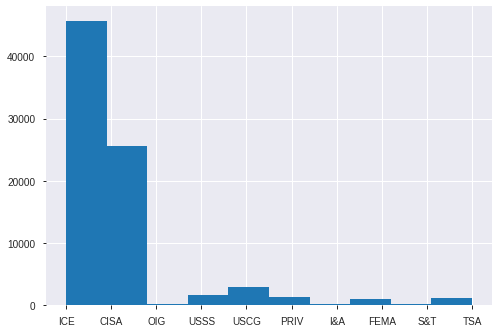

In [24]:
ax = train['Agency'].hist()

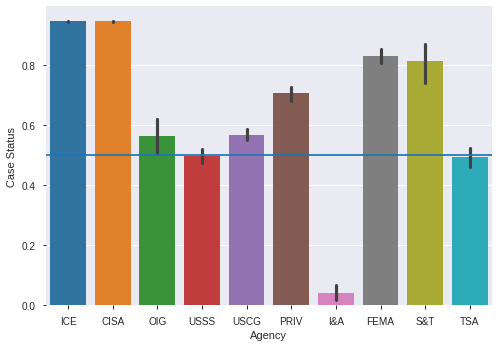

In [25]:
ax = sns.barplot(x=train['Agency'], y=train[target]=='Closed')
ax.axhline(y=0.5)
plt.show()

but, ICE and CISA cover the most and second most observations, and are both super high in % closed. this might screw up the model.

### Initial Request Type

In [26]:
explore(train['Initial Request Type'])

73523      ICE FOIA
3770      OBIM FOIA
113675     OIG FOIA
63107      ICE FOIA
68610      ICE FOIA
            ...    
71108      ICE FOIA
52188      ICE FOIA
116113      ST FOIA
77298      ICE FOIA
77944      ICE FOIA
Name: Initial Request Type, Length: 80091, dtype: object

count        80091
unique          26
top       ICE FOIA
freq         45593
Name: Initial Request Type, dtype: object

Nulls: 0

ICE FOIA                45593
OBIM FOIA               24979
USCG FOIA                2825
HQ FOIA                  1295
FEMA FOIA                1052
FOIA                      910
FOIA/PA                   743
TSA FOIA                  716
NPPD FOIA                 554
TSA Privacy Act           370
Initial Request           216
OIG FOIA                  188
ICE Consult               141
ST FOIA                   136
Consultation               75
OIG Privacy Act            69
USCG Privacy Act           57
USCG Consult               42
HQ Consult                 34
OBIM Consult           

In [27]:
# 26 unique, try to reduce

# remove leading agency specification
# remove leading 'Initial '
irt = train['Initial Request Type'].str.replace('^([A-Z]+|Initial) ', '')
irt.value_counts(), irt.nunique()

(FOIA            78248
 FOIA/PA           743
 Privacy Act       496
 Consult           305
 Request           216
 Consultation       83
 Name: Initial Request Type, dtype: int64, 6)

In [28]:
# combine FOIA/PA with Privacy Act

irt = irt.str.replace('FOIA/PA', 'Privacy Act')
irt.value_counts(), irt.nunique()

(FOIA            78248
 Privacy Act      1239
 Consult           305
 Request           216
 Consultation       83
 Name: Initial Request Type, dtype: int64, 5)

In [29]:
# combine all consultations

irt = irt.str.replace('Request', 'Consult')
irt = irt.str.replace('ation$', '')
irt.value_counts(), irt.nunique()

(FOIA           78248
 Privacy Act     1239
 Consult          604
 Name: Initial Request Type, dtype: int64, 3)

ends up with 3 unique values

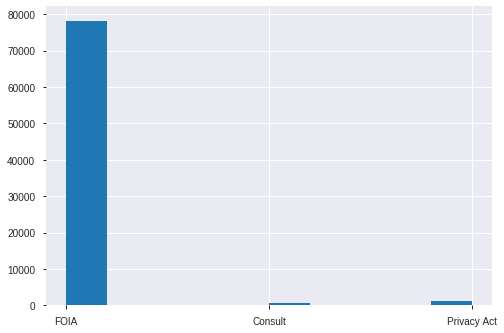

In [30]:
ax = irt.hist()
plt.show()

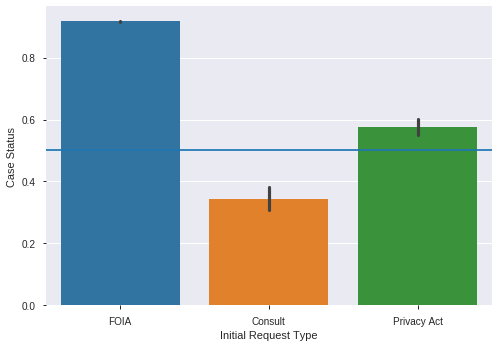

In [31]:
ax = sns.barplot(x=irt, y=train[target]=='Closed')
ax.axhline(y=0.5)
plt.show()

### Track Type

In [32]:
explore(train['Track Type'])

73523      Simple
3770      Complex
113675     Simple
63107      Simple
68610      Simple
           ...   
71108      Simple
52188      Simple
116113    Complex
77298      Simple
77944      Simple
Name: Track Type, Length: 80091, dtype: object

count      80091
unique         5
top       Simple
freq       53501
Name: Track Type, dtype: object

Nulls: 0

Simple       53501
Complex      26238
Expedite       339
Expedited       12
SImple           1
Name: Track Type, dtype: int64

['Simple' 'Complex' 'Expedite' 'Expedited' 'SImple']


In [33]:
# combine 'Expedite' and 'Expedited'
# fix capitalization

tt = train['Track Type'].str.replace('Expedited', 'Expedite')
tt = tt.str.replace('SImple', 'Simple')
tt.value_counts(), tt.nunique()

(Simple      53502
 Complex     26238
 Expedite      351
 Name: Track Type, dtype: int64, 3)

Ends up with 3 unique values

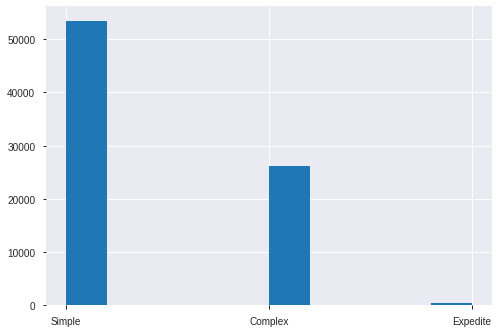

In [34]:
ax = tt.hist()
plt.show()

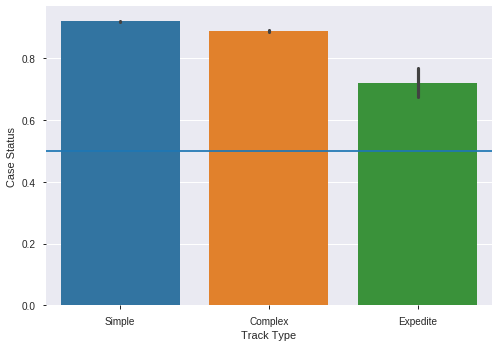

In [35]:
ax = sns.barplot(x=tt, y=train[target]=='Closed')
ax.axhline(y=0.5)
plt.show()

### Initial Received Date

this data is for fiscal years, which run from october 1 to september 30
- FY2018 = October 1, 2017 - September 30, 2018
- FY2017 = October 1, 2016 - September 30, 2017
- etc.

i will create a "Fiscal Year Received" column

i will create a "Backlogged" boolean column indicating whether a request originated before fiscal year 2018

i might create columns containing the month and day

i will drop this column

In [36]:
explore(train['Initial Received Date'])

73523     2018-05-30
3770      2018-01-13
113675    2018-07-02
63107     2018-07-16
68610     2018-06-21
             ...    
71108     2018-06-12
52188     2018-09-06
116113    2018-07-23
77298     2018-05-16
77944     2018-05-14
Name: Initial Received Date, Length: 80091, dtype: object

count          80091
unique          1264
top       2018-09-26
freq             793
Name: Initial Received Date, dtype: object

Nulls: 0

2018-09-26    793
2018-09-27    748
2018-09-28    704
2018-09-25    686
2018-09-17    576
             ... 
2014-10-09      1
2016-01-12      1
2014-04-11      1
2013-12-06      1
2015-07-21      1
Name: Initial Received Date, Length: 1264, dtype: int64

['2018-05-30' '2018-01-13' '2018-07-02' '2018-07-16' '2018-06-21'
 '2017-11-21' '2018-07-25' '2017-12-19' '2017-10-25' '2017-12-08'
 '2018-05-16' '2017-11-06' '2018-08-14' '2017-09-15' '2017-10-20'
 '2017-11-16' '2018-07-12' '2018-03-15' '2017-11-24' '2017-11-29'
 '2018-03-16' '2018-05-31' '2018-02-27' '2018-09-28' 

In [37]:
# convert to pandas datetime

ird = pd.to_datetime(train['Initial Received Date'], infer_datetime_format=True, errors='coerce')
ird

73523    2018-05-30
3770     2018-01-13
113675   2018-07-02
63107    2018-07-16
68610    2018-06-21
            ...    
71108    2018-06-12
52188    2018-09-06
116113   2018-07-23
77298    2018-05-16
77944    2018-05-14
Name: Initial Received Date, Length: 80091, dtype: datetime64[ns]

In [38]:
# get the fiscal year received
datetime_to_fiscal_year = lambda dt : dt.year if dt.month < 10 else dt.year + 1

fyr = ird.transform(datetime_to_fiscal_year)
fyr.name = 'Fiscal Year Received'
fyr

73523     2018
3770      2018
113675    2018
63107     2018
68610     2018
          ... 
71108     2018
52188     2018
116113    2018
77298     2018
77944     2018
Name: Fiscal Year Received, Length: 80091, dtype: int64

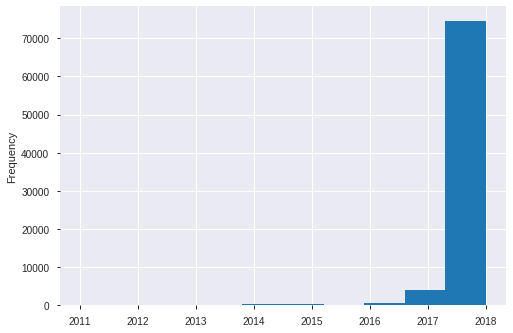

In [39]:
ax = fyr.plot.hist()

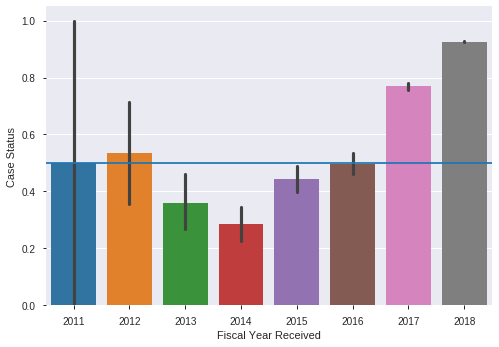

In [40]:
ax = sns.barplot(x=fyr, y=train[target]=='Closed')
ax.axhline(y=0.5)
plt.show()

In [41]:
# get whether or not this request was backlogged from previous years

bklg = fyr < 2018
bklg.name = 'Backlogged Request'
bklg

73523     False
3770      False
113675    False
63107     False
68610     False
          ...  
71108     False
52188     False
116113    False
77298     False
77944     False
Name: Backlogged Request, Length: 80091, dtype: bool

In [42]:
bklg.value_counts()

False    74622
True      5469
Name: Backlogged Request, dtype: int64

In [43]:
bklg.value_counts(normalize=True)

False    0.931715
True     0.068285
Name: Backlogged Request, dtype: float64

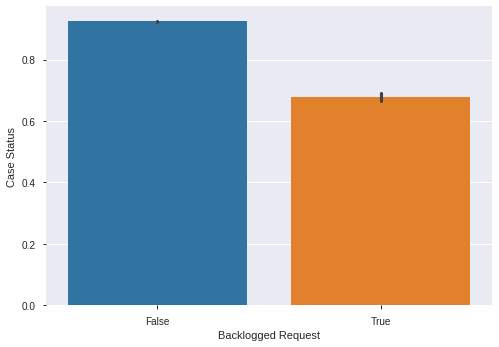

In [44]:
ax = sns.barplot(bklg, train[target]=='Closed')

In [45]:
ird.dt.month

73523     5
3770      1
113675    7
63107     7
68610     6
         ..
71108     6
52188     9
116113    7
77298     5
77944     5
Name: Initial Received Date, Length: 80091, dtype: int64

In [46]:
ird.dt.month_name().value_counts()

September    11380
May           7940
June          7517
July          7256
August        6871
April         6620
March         6357
October       5701
February      5299
November      5247
January       5171
December      4732
Name: Initial Received Date, dtype: int64

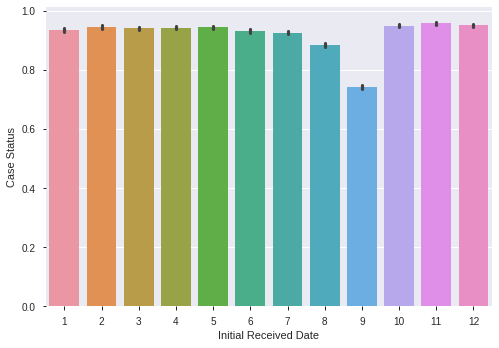

In [47]:
ax = sns.barplot(ird.dt.month, train[target]=='Closed')

i will include a column for Month requested because September stands out in the above graph

it looks as though it will provide good "predictability"

i will make a column for the month as integer and one as text to explore the difference of one-hot encoding vs ordinal encoding in the predictive models

In [48]:
ird.dt.day_name().value_counts()

Tuesday      20056
Wednesday    17546
Thursday     15019
Friday       13383
Monday       12683
Saturday       717
Sunday         687
Name: Initial Received Date, dtype: int64

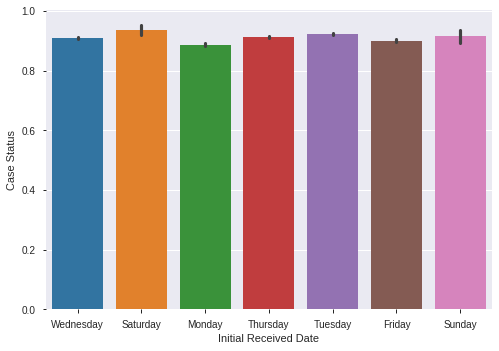

In [49]:
ax = sns.barplot(ird.dt.day_name(), train[target]=='Closed')

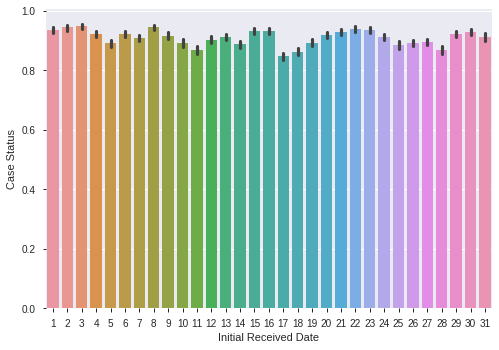

In [50]:
ax = sns.barplot(ird.dt.day, train[target]=='Closed')

### Perfected

i haven't been able to figure out exactly what perfected means.

i will explore its relation to other features to see what assumptions i feel ok with making.

i will create a "Fiscal Year Perfected" column.

i will drop this column

i may end up dropping all info from this column, because i think a request must be closed to be perfected. i think this might constitute "leakage" in the context of predictive modeling.

In [51]:
explore(train['Perfected'])

73523     NaN
3770      NaN
113675    NaN
63107     NaN
68610     NaN
         ... 
71108     NaN
52188     NaN
116113    NaN
77298     NaN
77944     NaN
Name: Perfected, Length: 80091, dtype: object

count           4801
unique           868
top       2018-05-22
freq              50
Name: Perfected, dtype: object

Nulls: 75290

2018-05-22    50
2018-08-16    35
2018-06-25    33
2016-07-28    33
2018-07-27    32
              ..
2015-11-16     1
2016-06-09     1
2015-12-08     1
2014-10-10     1
2015-11-24     1
Name: Perfected, Length: 868, dtype: int64

[nan '2017-12-08' '2018-01-18' '2017-12-07' '2017-11-13' '2017-08-14'
 '2016-07-27' '2015-07-16' '2018-01-02' '2018-04-09' '2017-03-28'
 '2018-04-25' '2017-09-29' '2017-09-25' '2018-05-01' '2018-08-31'
 '2017-04-25' '2017-07-05' '2017-10-24' '2016-05-04' '2018-03-30'
 '2017-04-07' '2018-08-09' '2018-07-18' '2018-03-27' '2017-06-07'
 '2018-08-23' '2018-08-20' '2015-05-18' '2018-03-13' '2017-12-15'
 '2017-01-03' '2013-01-22' '2017-01-30

In [52]:
# convert to pandas datetime

p = pd.to_datetime(train['Perfected'], infer_datetime_format=True, errors='coerce')
p

73523    NaT
3770     NaT
113675   NaT
63107    NaT
68610    NaT
          ..
71108    NaT
52188    NaT
116113   NaT
77298    NaT
77944    NaT
Name: Perfected, Length: 80091, dtype: datetime64[ns]

In [54]:
# get the fiscal year

years = p.transform(datetime_to_fiscal_year)
years.name = 'Fiscal Year Perfected'
# changing to strings for ease of plotting, for now
years = years.fillna(0).astype(int).astype(str).str.replace('^0$', '0000')
years

73523     0000
3770      0000
113675    0000
63107     0000
68610     0000
          ... 
71108     0000
52188     0000
116113    0000
77298     0000
77944     0000
Name: Fiscal Year Perfected, Length: 80091, dtype: object

In [55]:
years.value_counts()

0000    75290
2018     2971
2017     1125
2016      418
2015      160
2014       81
2013       37
2012        9
Name: Fiscal Year Perfected, dtype: int64

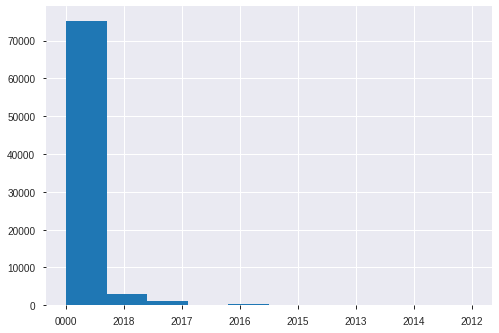

In [56]:
ax = years.hist()

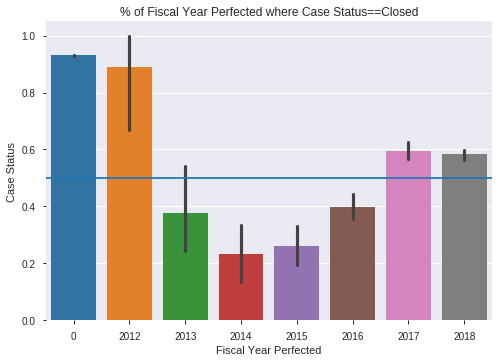

In [57]:
ax = sns.barplot(x=years.astype(int), y=train[target]=='Closed')
ax.axhline(y=0.5)
ax.set_title('% of Fiscal Year Perfected where Case Status==Closed')
plt.show()

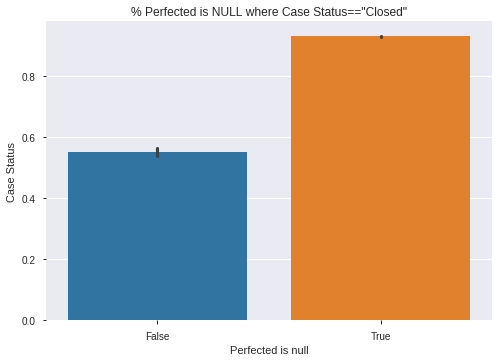

In [58]:
# get whether or not Perfected is null

p_null = p.isna()
p_null.name = 'Perfected is null'

ax=sns.barplot(x=p_null, y=train[target]=='Closed')
ax.set_title('% Perfected is NULL where Case Status=="Closed"')
plt.show()

In [59]:
has_perfected = train[~train['Perfected'].isnull()]
has_perfected

,Request #,Agency,Initial Request Type,Track Type,Initial Received Date,Perfected,Case Status,Days Opened,Closed Date,Days to Process,Disposition,"Disposition ""Other"" Reason",Exemptions Used
124013,20180350,USSS,FOIA,Complex,2017-12-08,2017-12-08,Open,203.0,NaN,NaN,NaN,NaN,NaN
115198,2018-HQFO-00515,PRIV,HQ FOIA,Simple,2018-01-18,2018-01-18,Closed,5.0,2018-01-25,1.0,Other Reasons,D(2),NaN
124011,20180333,USSS,FOIA,Complex,2017-12-07,2017-12-07,Closed,NaN,2018-07-19,154.0,Other Reasons,D(1),NaN
42070,2018-IAFO-00042,I&A,Initial Request,Simple,2017-11-13,2017-11-13,Open,NaN,2017-11-21,6.0,Other Reasons,D(7),NaN
114294,2017-HQFO-01225,PRIV,HQ FOIA,Complex,2017-08-14,2017-08-14,Closed,77.0,2017-12-05,77.0,Granted/Denied in Part,NaN,"(b)(6),(b)(7)(E)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123228,20171493,USSS,Consultation,Complex,2017-03-22,2017-03-22,Open,384.0,NaN,NaN,NaN,NaN,NaN
116530,2017-TSFO-00254,TSA,TSA FOIA,Complex,2017-05-11,2017-05-11,Closed,319.0,2018-08-17,319.0,Granted in Full,NaN,NaN
117707,2015-TSCO-00002,TSA,TSA Consult,Complex,2015-03-18,2015-03-18,Open,889.0,NaN,NaN,NaN,NaN,NaN
123102,20171002,USSS,FOIA,Complex,2017-02-15,2017-02-15,Open,408.0,NaN,NaN,NaN,NaN,NaN


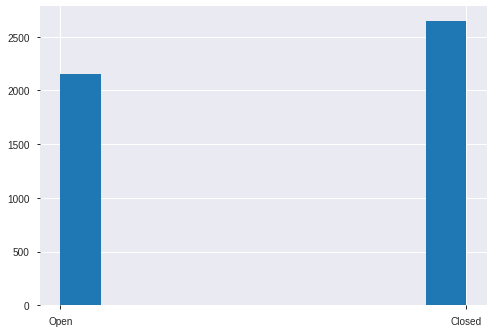

In [60]:
ax = has_perfected['Case Status'].hist()

In [61]:
has_perfected['Agency'].value_counts().sort_index()

FEMA    1024
I&A      216
PRIV    1076
S&T       80
TSA     1015
USSS    1390
Name: Agency, dtype: int64

In [62]:
train['Agency'].value_counts().sort_index()

CISA    25573
FEMA     1069
I&A       224
ICE     45734
OIG       266
PRIV     1329
S&T       140
TSA      1104
USCG     2924
USSS     1728
Name: Agency, dtype: int64

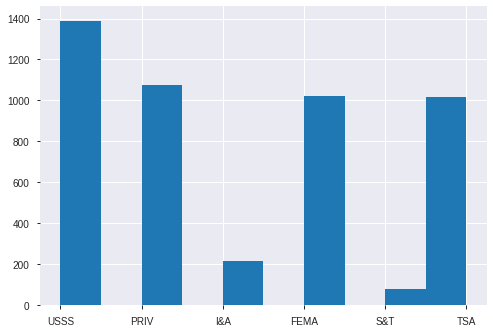

In [63]:
ax = has_perfected['Agency'].hist()

### Days Opened

In [64]:
train.columns

Index(['Request #', 'Agency', 'Initial Request Type', 'Track Type',
       'Initial Received Date', 'Perfected', 'Case Status', 'Days Opened',
       'Closed Date', 'Days to Process', 'Disposition',
       'Disposition "Other" Reason', 'Exemptions Used'],
      dtype='object')

## Wrangle function

In [0]:
def wrangle(dataframe):
  df = dataframe.copy()

  assert df['Request #'].nunique() == len(df['Request #']), '"Request #" contains non-unique values'
  df.set_index('Request #', inplace=True)

  df['Initial Request Type'] = df['Initial Request Type'].str.replace('^([A-Z]+|Initial) ', '')
  df['Initial Request Type'] = df['Initial Request Type'].str.replace('FOIA/PA', 'Privacy Act')
  df['Initial Request Type'] = df['Initial Request Type'].str.replace('Request', 'Consult')
  df['Initial Request Type'] = df['Initial Request Type'].str.replace('ation$', '')
  assert df['Initial Request Type'].nunique() == 3, 'Dirty data in "Initial Request Type"'

  df['Track Type'] = df['Track Type'].str.replace('Expedited', 'Expedite')
  df['Track Type'] = df['Track Type'].str.replace('SImple', 'Simple')
  assert df['Track Type'].nunique() == 3, 'Dirty data in "Track Type"'

  df['Initial Received Date'] = pd.to_datetime(df['Initial Received Date'], infer_datetime_format=True, errors='coerce')
  assert df['Initial Received Date'].isnull().sum() == 0, '"Initial Received Dates" contains null values'
  df['Fiscal Year Received'] = df['Initial Received Date'].transform(lambda dt : dt.year if dt.month < 10 else dt.year + 1)
  df['Backlogged Request'] = df['Fiscal Year Received'] < 2018
  df['Month Received'] = df['Initial Received Date'].dt.month
  df['Month Received Name'] = df['Initial Received Date'].dt.month_name()
  df.drop(['Initial Received Date'], axis=1, inplace=True)

  df['Perfected'] = pd.to_datetime(df['Perfected'], infer_datetime_format=True, errors='coerce')
  df['Fiscal Year Perfected'] = df['Perfected'].transform(lambda dt : dt.year if dt.month < 10 else dt.year + 1)
  df.drop(['Perfected'], axis=1, inplace=True)

  return df

In [83]:
df_train, df_val, df_test = map(wrangle, [train, test, val])
df_train.shape, df_val.shape, df_test.shape

((80091, 15), (25029, 15), (20023, 15))